In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/beauty-detection-data-set/class_dict.csv
/kaggle/input/beauty-detection-data-set/EfficientNetB1-beauty-100.0.h5
/kaggle/input/beauty-detection-data-set/beauty.csv
/kaggle/input/beauty-detection-data-set/images to predict/5.jpg
/kaggle/input/beauty-detection-data-set/images to predict/1.jpg
/kaggle/input/beauty-detection-data-set/images to predict/4.jpg
/kaggle/input/beauty-detection-data-set/images to predict/3.jpg
/kaggle/input/beauty-detection-data-set/images to predict/2.jpg
/kaggle/input/beauty-detection-data-set/valid/beautiful/029.jpg
/kaggle/input/beauty-detection-data-set/valid/beautiful/014.jpg
/kaggle/input/beauty-detection-data-set/valid/beautiful/150.jpg
/kaggle/input/beauty-detection-data-set/valid/beautiful/109.jpg
/kaggle/input/beauty-detection-data-set/valid/beautiful/034.jpg
/kaggle/input/beauty-detection-data-set/valid/beautiful/149.jpg
/kaggle/input/beauty-detection-data-set/valid/beautiful/024.jpg
/kaggle/input/beauty-detection-data-set/valid/beautiful

In [55]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
train_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/beauty-detection-data-set/train',
                                                       seed=123,shuffle=True,                                                    
                                                       image_size=(128,128),
                                                       batch_size=32
                                                      )

Found 4000 files belonging to 2 classes.


In [59]:
test_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/beauty-detection-data-set/test',
                                                       seed=123,shuffle=True,                                                    
                                                       image_size=(128,128),
                                                       batch_size=32
                                                      )

Found 300 files belonging to 2 classes.


In [60]:
val_data = tf.keras.utils.image_dataset_from_directory('/kaggle/input/beauty-detection-data-set/valid',
                                                       seed=123,shuffle=True,                                                    
                                                       image_size=(128,128),
                                                       batch_size=32
                                                      )

Found 300 files belonging to 2 classes.


In [61]:
class_labels = train_data.class_names
class_labels

['average', 'beautiful']

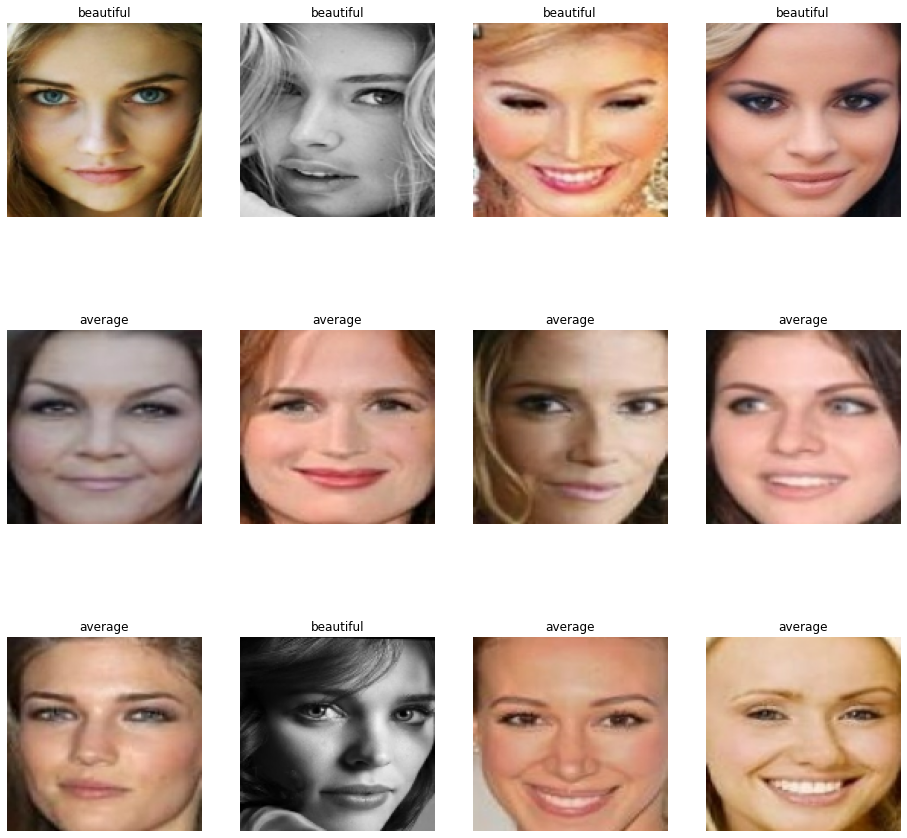

In [62]:
plt.figure(figsize=(16, 16))
for image_batch, labels_batch in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[labels_batch[i]])
        plt.axis("off")

In [63]:
class_names = train_data.class_names
print(class_names)

['average', 'beautiful']


In [64]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [65]:
from tensorflow.keras import layers
normalization_layer = layers.Rescaling(1./255)

In [66]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout

In [67]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(128, 128, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = "sigmoid")
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_8 (Rescaling)      (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 64)       

In [68]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
history = model.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/30
125/125 [==============================] - 5s 10ms/step - loss: 0.5344 - accuracy: 0.7220 - val_loss: 0.4331 - val_accuracy: 0.8267
Epoch 2/30
125/125 [==============================] - 1s 8ms/step - loss: 0.3771 - accuracy: 0.8397 - val_loss: 0.3120 - val_accuracy: 0.8700
Epoch 3/30
125/125 [==============================] - 1s 8ms/step - loss: 0.3148 - accuracy: 0.8650 - val_loss: 0.3031 - val_accuracy: 0.8867
Epoch 4/30
125/125 [==============================] - 1s 8ms/step - loss: 0.2870 - accuracy: 0.8740 - val_loss: 0.2352 - val_accuracy: 0.9133
Epoch 5/30
125/125 [==============================] - 1s 8ms/step - loss: 0.2356 - accuracy: 0.9060 - val_loss: 0.2582 - val_accuracy: 0.9033
Epoch 6/30
125/125 [==============================] - 1s 8ms/step - loss: 0.2017 - accuracy: 0.9200 - val_loss: 0.2653 - val_accuracy: 0.8800
Epoch 7/30
125/125 [==============================] - 1s 9ms/step - loss: 0.1771 - accuracy: 0.9275 - val_loss: 0.1649 - val_accuracy: 0.9400
Epoch

In [70]:
 model.save("beauty_class.h5")

In [73]:
from keras.models import load_model
trained_model = load_model("beauty_class.h5")

In [130]:
a=trained_model.evaluate(test_data)
score = trained_model.evaluate(test_data)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

10/10 [==============================] - 1s 7ms/step - loss: 0.1672 - accuracy: 0.9667
Test loss: 0.16722625494003296
Test accuracy: 0.9666666388511658
